# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [ ]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df_ai = pd.read_excel('/content/ieee-chatgpt-generation.xlsx')
df_ai['is_human'] = 0  # Add a new column 'is_human' to the DataFrame and set its value to 0, indicating AI-generated text.

df_hu = pd.read_excel('/content/ieee-init.xlsx')
df_hu['is_human'] = 1  # Add a new column 'is_human' to the DataFrame and set its value to 1, indicating human-written text.

# Number of samples
num_samples_Ai = df_ai.shape[0]
num_samples_Hu = df_hu.shape[0]

# Number of features
num_features_Ai = df_ai.shape[1]
num_features_Hu = df_hu.shape[1]


# Display these dataset characteristics
print(f"*AI-generated text*")
print(f"Number of samples: {num_samples_Ai}")
print(f"Number of features: {num_features_Ai}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df_ai.head())

# Display these dataset characteristics
print(f"*Human-written text*")
print(f"Number of samples: {num_samples_Hu}")
print(f"Number of features: {num_features_Hu}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df_hu.head())



*AI-generated text*
Number of samples: 15395
Number of features: 7
Example data:
   Unnamed: 0.1  Unnamed: 0       id  \
0             0           0  8600003   
1             1           1  8600004   
2             2           2  8600008   
3             3           3  8600013   
4             4           4  8600014   

                                               title  \
0  An Improved Variable-Node-Based BP Decoding Al...   
1  Mobile Robot Location Algorithm Based on Impro...   
2  Vertical Handoff Decision Algorithm for Hetero...   
3  Robust offline trained neural network for TDOA...   
4  Gaussian MAC with Feedback and Strictly Causal...   

                                             keyword  \
0  "Flash memories","Reliability","Decoding","Par...   
1  "Sociology","Statistics","Simultaneous localiz...   
2  "Entropy","Handover","Wireless networks","Deci...   
3  "Microphones","Artificial neural networks","Po...   
4  "Encoding","Transmitters","Decoding","Indexes"...   

    

###Combining AI and Human-Written Text Data


In [ ]:
from sklearn.utils import shuffle # Import shuffle from sklearn.utils
# Concatenate the human-written and AI-generated text DataFrames along the rows (axis=0).
# Reset the index of the combined DataFrame to avoid duplicate indices.
combined_df = pd.concat([df_hu, df_ai], axis=0).reset_index(drop=True)

# Shuffle the combined DataFrame to randomize the order of the rows.
# Reset the index again to maintain a sequential order after shuffling.
df = shuffle(combined_df).reset_index(drop=True)

print(df.head())  # Display the first 5 rows of the shuffled DataFrame to verify the data structure and contents.

print(df.columns)  # Display the column names of the DataFrame to verify that all expected columns are present.

        id                                              title  \
0  8711770  Analysing the Impact of Various Deterministic ...   
1  8766733       Analysis of the Impact of eMTC on Legacy LTE   
2  8619451  Bayesian Nonparametrics and Feedback-Linearisa...   
3  8767011  H&lt;sub&gt;∞&lt;/sub&gt; Filtering of Repeate...   
4  8761156  Content-Aware Personalised Rate Adaptation for...   

                                             keyword  \
0  "Jitter","Inverters","Power supplies","Transfe...   
1  "Long Term Evolution","Business","Bandwidth","...   
2  "Bayes methods","Trajectory","Adaptation model...   
3  "Nonlinear systems","System performance","Stat...   
4  "Streaming media","Bit rate","Quality of exper...   

                                            abstract  is_human  Unnamed: 0.1  \
0  This paper presents an analysis of jitter due ...         1           NaN   
1  Recently, eMTC(Enhanced Machine Type Communica...         1           NaN   
2  We propose random field syste

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [ ]:
# Drop the unnecessary columns 'Unnamed: 0.1', 'Unnamed: 0', and 'id' from the DataFrame.
# These columns may be redundant or irrelevant for the text classification task.
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id'], axis=1)


# Check for missing values
print("\nMissing values in AI Generated Text Dataset:")
print(df_ai.isnull().sum())

print("\nMissing values in Human Written Text Dataset:")
print(df_hu.isnull().sum())

print("\nMissing values in Combined Text Dataset:")
print(df.isnull().sum())  # Check each column in the DataFrame for missing values and count how many are present.




Missing values in AI Generated Text Dataset:
Unnamed: 0.1    0
Unnamed: 0      0
id              0
title           0
keyword         0
abstract        0
is_human        0
dtype: int64

Missing values in Human Written Text Dataset:
id          0
title       0
keyword     0
abstract    0
is_human    0
dtype: int64

Missing values in Combined Text Dataset:
title       0
keyword     0
abstract    0
is_human    0
dtype: int64


In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here
# No missing value are found in our dataset

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


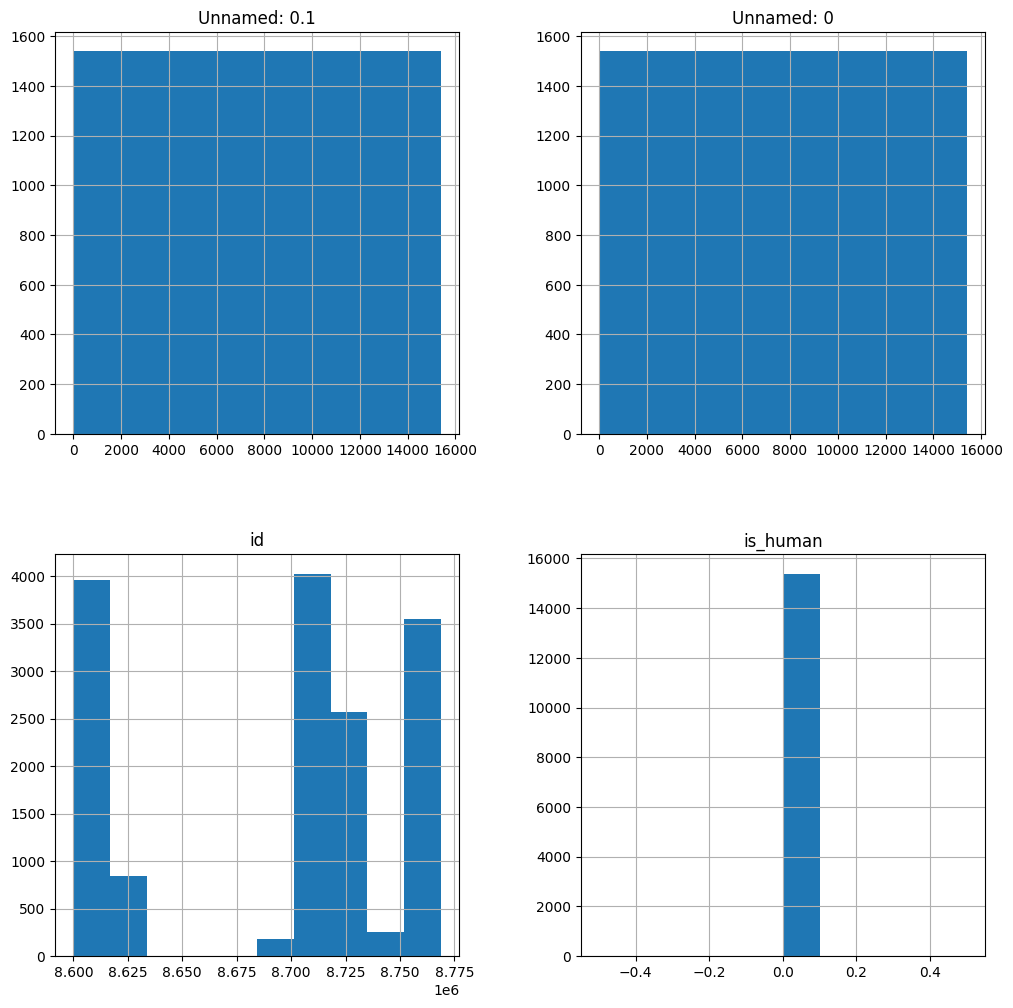

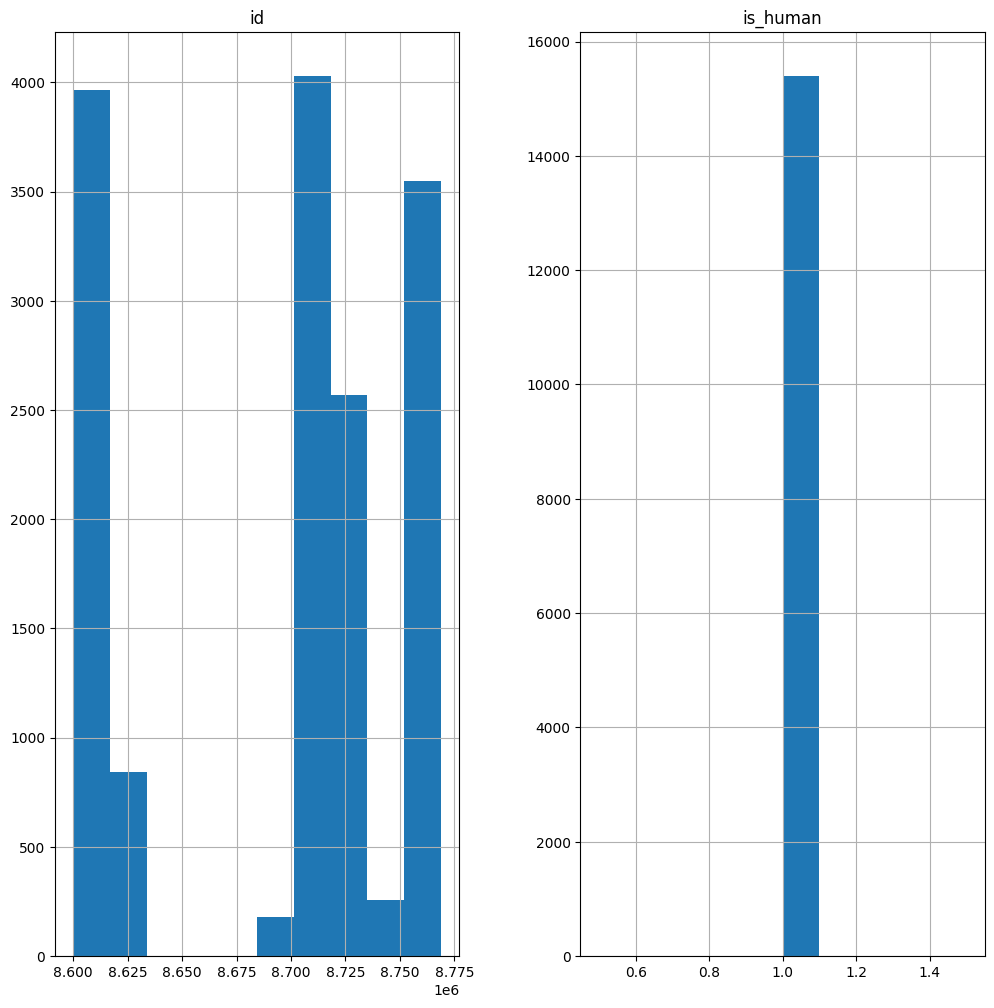

In [ ]:
import matplotlib.pyplot as plt
# Example: Plotting histograms of all numerical features
df_ai.hist(figsize=(12, 12))
plt.show()

df_hu.hist(figsize=(12, 12))
plt.show()


##Pre-processing and Data Cleaning
Before we start text preprocessing, we need to download essential NLTK resources, such as stopwords, the Punkt tokenizer, and the WordNet lemmatizer, which are used for various text processing tasks.

In [ ]:
import nltk  # Import NLTK for natural language processing tasks.
from nltk.corpus import stopwords  # Import stopwords from NLTK to remove common words.
import re  # Import the regular expressions library for text processing.
from nltk.tokenize import word_tokenize  # Import word_tokenize for splitting text into words.
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer for reducing words to their root form.
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs and visualizations.
from wordcloud import WordCloud  # Import WordCloud for creating word cloud visualizations.

In [ ]:
nltk.download('stopwords')  # Download the list of common stopwords used to remove non-informative words from the text.
nltk.download('punkt')  # Download the Punkt tokenizer models used for breaking down text into sentences and words.
nltk.download('punkt_tab')
nltk.download('wordnet')  # Download the WordNet lemmatizer, which is used for reducing words to their root forms.

# Create a set of English stopwords from NLTK to remove common words that do not contribute to the meaning of the text.
stop_words = set(stopwords.words('english'))

# Initialize the WordNetLemmatizer from NLTK for converting words to their base or root form (lemmatization).
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We are defining a custom function to clean and preprocess the text data. This function will remove numbers, punctuation, and stopwords, as well as lemmatize the words to their root form.

In [ ]:
def clean_text(text):
    text = re.sub(r'\d+', '', text) # Remove numbers from the text

    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation from the text

    words = word_tokenize(text) # Tokenize the text into words

    words = [word for word in words if word.lower() not in stop_words] # Remove stopwords from the tokenized words

    words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize the words to their base or root form

    return ' '.join(words) # Join the cleaned and lemmatized words back into a single string

In [ ]:
# Specify the columns in the DataFrame that contain text data to be cleaned.
columns_to_clean = ['keyword', 'abstract', 'title']

# Apply the clean_text function to each column in the columns_to_clean list.
for column in columns_to_clean:
    df[column] = df[column].apply(clean_text)

# Display the first 5 rows of the DataFrame to inspect the cleaned text data and ensure the cleaning process was successful.
df.head()


,title,keyword,abstract,is_human
0,Analysing Impact Various Deterministic Noise S...,JitterInvertersPower suppliesTransfer function...,paper present analysis jitter due various dete...,1
1,Analysis Impact eMTC Legacy LTE,Long Term EvolutionBusinessBandwidthDownlinkUp...,Recently eMTCEnhanced Machine Type Communicati...,1
2,Bayesian Nonparametrics FeedbackLinearisation ...,Bayes methodsTrajectoryAdaptation modelsConver...,propose random field system identification inv...,1
3,Hltsubgtltsubgt Filtering Repeated Scalar Nonl...,Nonlinear systemsSystem performanceState estim...,paper proposes method H filtering repeated sca...,0
4,ContentAware Personalised Rate Adaptation Adap...,Streaming mediaBit rateQuality experienceBandw...,paper proposes contentaware personalised rate ...,0


We are creating a function to generate and display word clouds from text data. Word clouds provide a visual representation of the most frequent words in the text.

In [ ]:
def generate_wordcloud(text_data, title):
    # Generate a word cloud from the text data
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))  # Set the figure size for better visualization
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with smooth interpolation
    plt.title(title)  # Set the title for the word cloud plot
    plt.axis('off')  # Hide the axis for a cleaner visual presentation
    plt.show()  # Display the plot

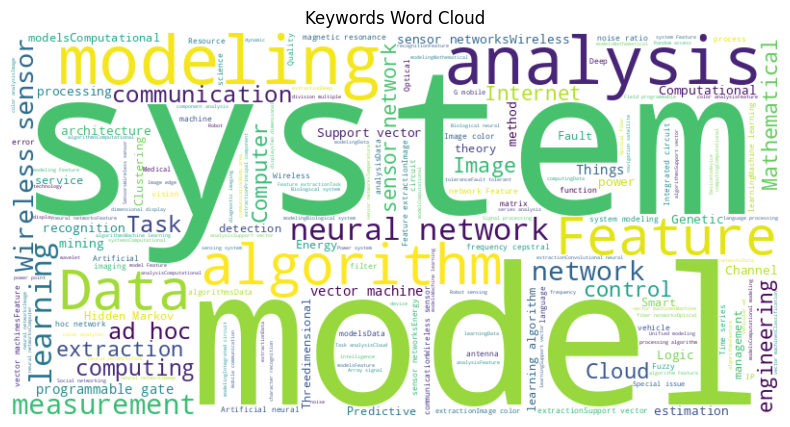

,count
is_human,
1,15395
0,15395


In [ ]:
# Generate and display a word cloud for the 'keyword' column with the title 'Keywords Word Cloud'.
generate_wordcloud(df['keyword'], 'Keywords Word Cloud')

# Count the number of occurrences of each label (0 for AI-generated, 1 for human-written) in the 'is_human' column.
df['is_human'].value_counts()

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]



Duplicate entries in Combined Text Dataset:
2


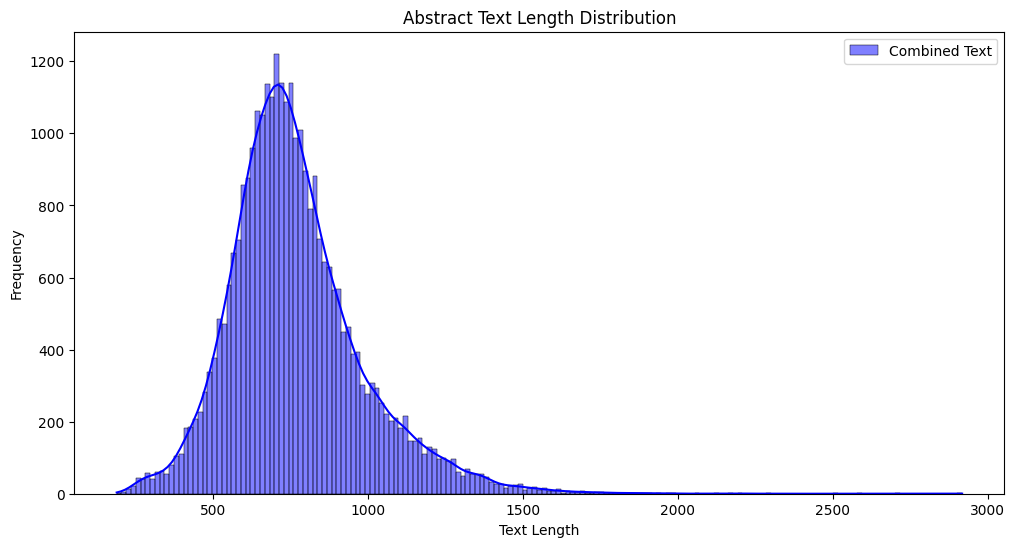


Missing values in Combined Text Dataset:
title          0
keyword        0
abstract       0
is_human       0
text_length    0
dtype: int64

Top 10 keywords in Combined Text Dataset:
keyword
Internet ThingsGreen computingSocial computingBlockchainInformation technology                              12
IronFrequency modulationIP network                                                                           8
Artificial intelligence                                                                                      6
ConferencesMachine learning                                                                                  6
Handheld computersInternet ThingsGreen computingSocial computingBlockchainInformation technology             6
ConferencesArtificial intelligenceVirtual reality                                                            6
RoutingProposalsReinforcement learningOptical fiber networksQuality serviceIP networksNetwork topology       4
ConvergenceUncertaintySystematic

In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for duplicate entries
print("\nDuplicate entries in Combined Text Dataset:")
print(df.duplicated().sum())

# Investigate text length distributions
if 'abstract' in df.columns:
    df['text_length'] = df['abstract'].apply(len)

    plt.figure(figsize=(12, 6))
    sns.histplot(df['text_length'], color='blue', label='Combined Text', kde=True)
    plt.legend()
    plt.title('Abstract Text Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\nNo 'abstract' column found in one or both datasets to analyze text length distribution.")

# Check for missing values
print("\nMissing values in Combined Text Dataset:")
print(df.isnull().sum())

# Investigate keyword diversity
if 'keyword' in df.columns:
    cd_keywords = df['keyword'].str.split(';').explode().value_counts()

    print("\nTop 10 keywords in Combined Text Dataset:")
    print(cd_keywords.head(10))

    # Keyword diversity comparison
    unique_cd_keywords = cd_keywords.index.nunique()

    print(f"\nUnique keywords in Combined Text Dataset: {unique_cd_keywords}")
else:
    print("\nNo 'keyword' column found in datasets to analyze keyword diversity.")

# Check for ID uniqueness
# print("\nID uniqueness in Combined Text Dataset:")
# print(df['id'].is_unique)




## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


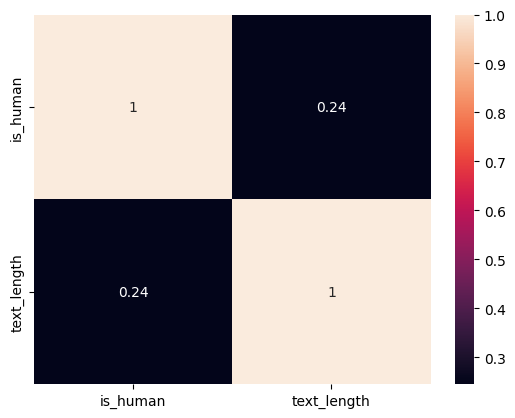

In [ ]:
# Example: Plotting a heatmap to show feature correlations
# Select only numerical features for correlation calculation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()






Saving Combined Text Dataset

In [ ]:
df.to_csv('/content/Combined-Text-Dataset.csv', index=False)